<a href="https://www.kaggle.com/uday44/credit-card-fraud-analysis?scriptVersionId=89056293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Getting more details of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#looks like there are no missing values found in the dataset.
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#Checking the highly imbalanced target variable.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

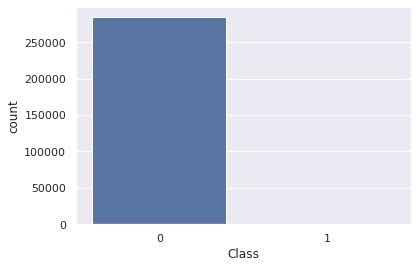

In [6]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data=df)

In [7]:
genuine_percentage = df['Class'].value_counts()[0]/(len(df))
fraud_percentage = df['Class'].value_counts()[1]/(len(df))
d = {'Genuine': genuine_percentage, 'Fraud': fraud_percentage}
percentages = pd.DataFrame(data = d, index=[0])
percentages

,Genuine,Fraud
0,0.998273,0.001727


<AxesSubplot:>

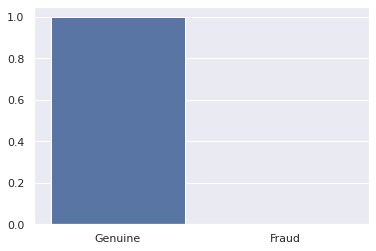

In [8]:
sns.barplot(data = percentages)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

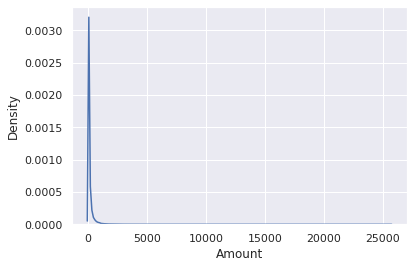

In [9]:
sns.kdeplot(df['Amount'])

## We see a major class imbalance problem in our dataset.

Why class imbalance is such a huge problem?
If we observe our target varable in the dataset, we have 284315 of Genuine transactions and 492 Fradulent transactions and when we look into their percentages, we observe 0.9982% is genuine and 0.0018 as fradulent. When we build a classification model on this data, our baseline model itself predicts an instance as genuine transaction with 99.82% accuracy and our fradulent transaction prediction accuracy is only 0.18%. There are high chances that a fradulent transaction can be predicted as a genuine one, the risk which we cannot afford.

## Let us try few classification Algorithms without dealing the class imbalance problem.

In [10]:
df = df.drop('Time', axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3)

In [12]:
train_set['Class'].value_counts()

0    199025
1       339
Name: Class, dtype: int64

In [13]:
train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118488,1.234615,-0.024192,0.587083,-0.117676,-0.534076,-0.533959,-0.227096,-0.073423,0.269303,-0.281976,...,-0.095189,-0.194467,0.114350,0.158937,0.070825,0.931030,-0.049598,0.008326,5.37,0
84371,1.232168,0.016128,-0.224812,1.092947,0.385276,0.583978,-0.038589,0.151156,0.604929,-0.087092,...,-0.201012,-0.440016,-0.231790,-1.359173,0.794814,-0.222197,0.025727,0.001298,23.86,0
9317,1.033365,-0.014854,1.072888,1.591331,-0.216666,1.131354,-0.647461,0.370989,1.869981,-0.506234,...,-0.153431,0.183275,-0.042846,-0.308124,0.490752,-0.285171,0.060044,0.003146,9.00,0
151280,-1.707949,1.105650,1.711379,0.393440,0.204335,-0.005788,0.047432,-0.319388,1.339398,-1.693595,...,0.114541,-1.877739,-0.163783,-0.236585,0.536702,-1.088524,0.026748,-0.103648,24.75,0
62157,-0.381674,1.106454,1.309798,0.073233,0.135106,-1.016595,0.694761,-0.094738,-0.462517,-0.518312,...,-0.254119,-0.653134,-0.012974,0.347501,-0.142336,0.070312,0.247215,0.100461,1.29,0


In [14]:
train_y = train_set['Class']
train_x = train_set.drop('Class', axis = 1)

In [15]:
test_y = test_set['Class']
test_x = test_set.drop('Class', axis = 1)

In [16]:
train_time = train_x[['Amount']]
test_time = test_x[['Amount']]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_time = scaler.fit_transform(train_time)
test_time = scaler.transform(test_time)

In [18]:
train_x['Amount'] = train_time
test_x['Amount'] = test_time

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0).fit(train_x, train_y)

In [20]:
from sklearn.metrics import accuracy_score
train_y_pred = log_clf.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

0.9991773840813788


In [21]:
test_y_pred = log_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9991807403766253


In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[85276,    14],
       [   56,    97]])

In [23]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.87      0.63      0.73       153

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



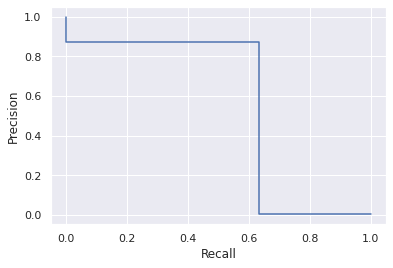

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_recall_curve, 
                             PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(test_y, test_y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier 

tree_clf = DecisionTreeClassifier().fit(train_x, train_y)

In [26]:
#Train Accuracy
from sklearn.metrics import accuracy_score
train_y_pred = tree_clf.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

1.0


In [27]:
#Test Accuracy
test_y_pred = tree_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9990285921608558


In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[85246,    44],
       [   39,   114]])

In [29]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.72      0.75      0.73       153

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443



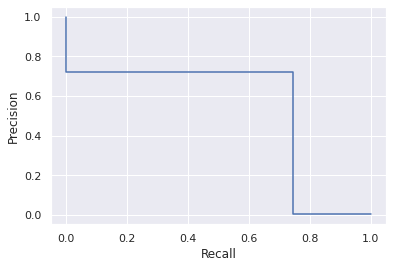

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_recall_curve, 
                             PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(test_y, test_y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier().fit(train_x, train_y)

In [32]:
#Train Accuracy
train_y_pred = rf_clf.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

1.0


In [33]:
#Test Accuracy
test_y_pred = rf_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9995903701883126


In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[85285,     5],
       [   30,   123]])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.96      0.80      0.88       153

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



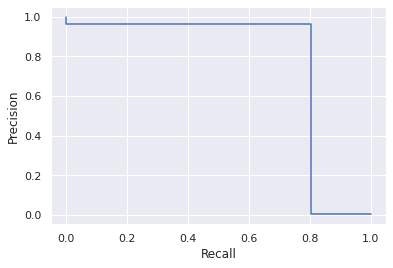

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_recall_curve, 
                             PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(test_y, test_y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## Handling Class Imbalance with Undersampling Majority Class.

In this method we bring down the majority class(Genuine) instances to match it with the minority(Fraud) class instances.

In [37]:
train_set['Class'].value_counts()

0    199025
1       339
Name: Class, dtype: int64

In [38]:
#We have 344 Fraud class instances in our train set, so bring down the Genuine class instances to 344 as well.
#Remember we are reducing the majority class instanes in Train Set only.
#We build models on Reduced dataset and test on original Test Set.
Genuine_instances = train_set[train_set['Class'] == 0]
Fraud_instances = train_set[train_set['Class'] == 1]

In [39]:
Genuine_instances_sample = Genuine_instances.sample(n = 2*(len(Fraud_instances)))

In [40]:
train_reduced = pd.concat([Genuine_instances_sample,Fraud_instances], axis = 0)
train_reduced.shape

(1017, 30)

In [41]:
train_y = train_reduced['Class']
train_x = train_reduced.drop('Class', axis = 1)

In [42]:
test_y = test_set['Class']
test_x = test_set.drop('Class', axis = 1)

In [43]:
train_amount = train_x[['Amount']]
test_amount = test_x[['Amount']]

In [44]:
scaler = StandardScaler()
train_amount = scaler.fit_transform(train_amount)
test_amount = scaler.transform(test_amount)

In [45]:
train_x['Amount'] = train_amount
test_x['Amount'] = test_amount

## Random Forest Classifier

In [46]:
rf_clf2 = RandomForestClassifier().fit(train_x, train_y)

In [47]:
train_y_pred = rf_clf2.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

1.0


In [48]:
#Test Accuracy
test_y_pred = rf_clf2.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9899231066324918


In [49]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[84445,   845],
       [   16,   137]])

In [50]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85290
           1       0.14      0.90      0.24       153

    accuracy                           0.99     85443
   macro avg       0.57      0.94      0.62     85443
weighted avg       1.00      0.99      0.99     85443



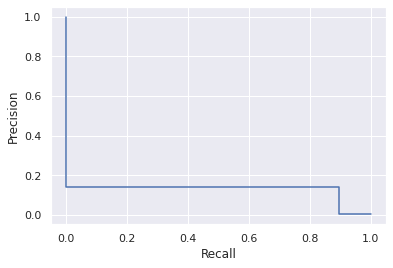

In [51]:
precision, recall, _ = precision_recall_curve(test_y, test_y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

1. As here our major goal is to reduce the False Negatives, we consider Recall as our primary metric.

2. Recall in classification models with original data is around 80% with best model(Random Forest).
 
3. When we have performed undersampling method, the recall has reached to 92%, that is quite an improvement!
 
4. Major drawback here is F1 score has fallen drastically as the False Positives increased.